In [33]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [34]:
tqdm.pandas()

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv('df_geo2.csv')

In [37]:
df.head()

accommodates  bathrooms  bedrooms  price  cleaning_fee  security_deposit  \
0             3        1.0       1.0   60.0          30.0             200.0   
1             2        1.0       1.0   17.0           0.0               0.0   
2             4        1.0       1.0   90.0          50.0             200.0   
3             2        1.0       1.0   26.0          30.0             250.0   
4             2        1.0       1.0   42.0           0.0               0.0   

   extra_people  guests_included  size  \
0          28.0                1  75.0   
1           0.0                1  25.0   
2          20.0                2  68.0   
3          18.0                1  26.0   
4          24.0                1  20.0   

                                         description  ...  building  \
0  Great location!  30 of 75 sq meters. This wood...  ...  1.741361   
1  In the summertime we are spending most of our ...  ...  2.538543   
2  This beautiful first floor apartment  is situa...  ...  2.758048   
3  First of all: I prefer short-notice bookings. ...  ...  2.509475   
4  Cozy and large room in the beautiful district ...  ...  2.814886   

  technical_monument        car wayside_cross bomb_crater citywalls  \
0           3.091847   9.925240      6.937165   18.482076  4.392084   
1           4.605447  11.393392      7.114765   19.497892  3.021888   
2           3.094960   9.740443      7.946521   17.799353  4.763966   
3           4.376013   8.478120      4.938493   19.120844  8.441227   
4           3.985712  10.663374      7.769693   18.577517  3.906988   

   wayside_shrine     pillar    bridge     church  
0        9.228878  16.678492  4.568156  12.529371  
1       10.760654  17.972337  5.654737  14.034871  
2        9.618180  16.232543  5.475431  12.975228  
3        4.966409  15.943858  1.527151   7.777328  
4       10.404674  17.118325  5.808965  13.735614  

[5 rows x 64 columns]

In [38]:
import os
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans 

In [40]:
vectorizer = TfidfVectorizer(max_features=200000, lowercase=True,
                             min_df=5, stop_words='english',
                             use_idf=True)

In [41]:
df = df.dropna(subset=['description'])

In [49]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [51]:
num_clusters = 20
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

In [58]:
reduced_data = PCA(n_components=pca_num_components).fit_transform(X1)

In [53]:
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

In [54]:
labels = clustering_model.fit_predict(tf_idf_matrix)

In [42]:
X = vectorizer.fit_transform(df['description'])

In [55]:
tf_idf_matrix = vectorizer.fit_transform(df['description'])

In [56]:
X1 = tf_idf_matrix.todense()

KeyError: 12

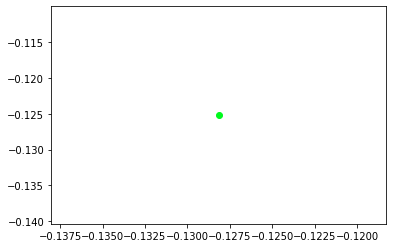

In [59]:
fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

In [ ]:
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X1)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

In [11]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
df["class"] = kmeans.labels_

In [12]:
df.head()

accommodates  bathrooms  bedrooms  price  cleaning_fee  security_deposit  \
0             3        1.0       1.0   60.0          30.0             200.0   
1             2        1.0       1.0   17.0           0.0               0.0   
2             4        1.0       1.0   90.0          50.0             200.0   
3             2        1.0       1.0   26.0          30.0             250.0   
4             2        1.0       1.0   42.0           0.0               0.0   

   extra_people  guests_included  size  \
0          28.0                1  75.0   
1           0.0                1  25.0   
2          20.0                2  68.0   
3          18.0                1  26.0   
4          24.0                1  20.0   

                                         description  ... technical_monument  \
0  Great location!  30 of 75 sq meters. This wood...  ...           3.091847   
1  In the summertime we are spending most of our ...  ...           4.605447   
2  This beautiful first floor apartment  is situa...  ...           3.094960   
3  First of all: I prefer short-notice bookings. ...  ...           4.376013   
4  Cozy and large room in the beautiful district ...  ...           3.985712   

         car wayside_cross bomb_crater citywalls wayside_shrine     pillar  \
0   9.925240      6.937165   18.482076  4.392084       9.228878  16.678492   
1  11.393392      7.114765   19.497892  3.021888      10.760654  17.972337   
2   9.740443      7.946521   17.799353  4.763966       9.618180  16.232543   
3   8.478120      4.938493   19.120844  8.441227       4.966409  15.943858   
4  10.663374      7.769693   18.577517  3.906988      10.404674  17.118325   

     bridge     church class  
0  4.568156  12.529371    11  
1  5.654737  14.034871    12  
2  5.475431  12.975228     9  
3  1.527151   7.777328    17  
4  5.808965  13.735614    16  

[5 rows x 65 columns]

In [13]:
features = ['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee',
 'accommodates',
 'host_is_superhost',
 'host_identity_verified',
 'instant_bookable',
 'cancellation_not_flexible',
 'size',
 'information',
 'artwork',
 'hotel',
 'motel',
 'viewpoint',
 'hostel',
 'museum',
 'yes',
 'attraction',
 'picnic_site',
 'guest_house',
 'gallery',
 'theme_park',
 'sightseeing',
 'chalet',
 'zoo',
 'camp_site',
 'highlight',
 'apartment',
 'aquarium',
 'spa_resort',
 'caravan_site',
 'tower_viewer',
 'day_spa',
 'lean_to', 'class']

In [15]:
POI_list = ['memorial', 'monument', 'locomotive', 'tomb', 'yes',
       'telephone_cabin', 'aircraft', 'statue', 'vehicle', 'tank',
       'cannon', 'heritage', 'ruins', 'boundary_stone', 'battlefield',
       'milestone', 'archaeological_site', 'sign', 'stone', 'water_well',
       'building', 'technical_monument', 'car', 'wayside_cross',
       'bomb_crater', 'citywalls', 'wayside_shrine', 'pillar', 'bridge',
       'church']

In [20]:
selected = ['is_entire_apt',
 'hair_dryer',
 'lap_friendly',
 'Washer',
 'minimum_nights_more_1',
 'cleaning_fee',
 'accommodates',
 'host_is_superhost',
 'host_identity_verified',
 'instant_bookable',
 'cancellation_not_flexible',
 'size', 'class']

In [21]:
features = selected + POI_list

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledFeatures = sc.fit_transform(df[features])

In [23]:
X1 = scaledFeatures
y = df["price"]

In [24]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

In [26]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

In [27]:
xgb_clf = xgb.XGBRegressor()
parameters = {'n_estimators': [120, 100, 140], 'max_depth':[3,5,7,9]}
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

[17:48:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'max_depth': 5, 'n_estimators': 140}


In [28]:
xgb_clf = xgb.XGBRegressor(n_estimators=140, max_depth=5)
xgb_clf.fit(X_train, y_train)
y_test_pred = xgb_clf.predict(X_test)
print("R^2 score: {0: .4f}".format(r2_score(y_test, y_test_pred)))
print("RMSE: {0: .4f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
mae = metrics.mean_absolute_error(y_test, y_test_pred)
print("MAE:",mae)

[17:49:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 score:  0.6571
RMSE:  25.4954
MAE: 15.304988704227737
